In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
data=pd.read_csv("/content/fraudTest (3).csv")

In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0
555718,555718,2020-12-31 23:59:34,4170689372027579,fraud_Dare-Marvin,entertainment,38.13,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1765bb45b3aa3224b4cdcb6e7a96cee3,1388534374,36.210097,-97.036372,0


In [ ]:
print(data.shape)
print(data.describe())

(555719, 23)
          Unnamed: 0        cc_num            amt            zip  \
count  555719.000000  5.557190e+05  555719.000000  555719.000000   
mean   277859.000000  4.178387e+17      69.392810   48842.628015   
std    160422.401459  1.309837e+18     156.745941   26855.283328   
min         0.000000  6.041621e+10       1.000000    1257.000000   
25%    138929.500000  1.800429e+14       9.630000   26292.000000   
50%    277859.000000  3.521417e+15      47.290000   48174.000000   
75%    416788.500000  4.635331e+15      83.010000   72011.000000   
max    555718.000000  4.992346e+18   22768.110000   99921.000000   

                 lat           long      city_pop     unix_time  \
count  555719.000000  555719.000000  5.557190e+05  5.557190e+05   
mean       38.543253     -90.231325  8.822189e+04  1.380679e+09   
std         5.061336      13.721780  3.003909e+05  5.201104e+06   
min        20.027100    -165.672300  2.300000e+01  1.371817e+09   
25%        34.668900     -96.798000  7.

In [ ]:
fraud = data[data['is_fraud']==1]
valid = data[data['is_fraud']==0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['is_fraud']==1])))
print('Valid Transactions: {}'.format(len(data[data['is_fraud']==0])))

0.003874820710510248
Fraud Cases: 2145
Valid Transactions: 553574


In [ ]:
print("amount details of fraudulent transactions")
fraud.amt.describe()

amount details of fraudulent transactions


count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

In [ ]:
print("detalis of valid transaction")
valid.amt.describe()

detalis of valid transaction


count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64

In [ ]:
valid_sample=valid.sample(50356)

In [ ]:
new_data=pd.concat([valid_sample,fraud],axis=0)

In [ ]:
new_data=pd.concat([valid_sample,fraud],axis=0)

In [ ]:
new_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
121099,121099,2020-08-02 20:48:57,6592074504369261,fraud_Mohr-Bayer,shopping_net,1.08,Amanda,Molina,F,8425 Daniel Knolls Suite 288,...,40.0897,-74.9781,1526206,Commercial horticulturist,1972-05-23,404fc2dce809ede266835a56c51b7023,1375476537,40.151288,-74.393665,0
553593,553593,2020-12-31 11:33:02,676173792455,fraud_Erdman-Kertzmann,gas_transport,56.05,Brittany,Cox,F,07177 William Dale Apt. 547,...,34.0287,-118.4924,92043,"Civil engineer, contracting",1961-04-25,9a4005e6670706e8626726feeb44a0a5,1388489582,33.146737,-118.420956,0
512672,512672,2020-12-22 04:48:03,2233882705243596,fraud_Christiansen-Gusikowski,misc_pos,8.18,Jamie,Robinson,F,67089 Caitlin Meadow Apt. 905,...,33.3570,-89.0473,1923,Medical physicist,1960-01-16,88e1a468b5e27894ad593cbfabec7b79,1387687683,34.308705,-89.906369,0
248403,248403,2020-09-20 06:30:17,3521815216091574,fraud_Bailey-Morar,grocery_pos,104.36,Wayne,Marsh,M,172 Leonard Island,...,39.7532,-105.6356,565,Mental health nurse,1978-08-27,881809ee4611d1aae269cc5c57de6473,1379658617,40.238641,-104.920446,0
515003,515003,2020-12-22 14:46:31,4170689372027579,"fraud_Pouros, Walker and Spencer",kids_pets,8.54,Samuel,Frey,M,830 Myers Plaza Apt. 384,...,35.6665,-97.4798,116001,Media buyer,1993-05-10,1dfa3b2d70deb0b19631ecd26cdd796a,1387723591,35.197575,-97.495946,0


In [ ]:
new_data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
517197,517197,2020-12-22 22:05:48,2242176657877538,"fraud_Willms, Kris and Bergnaum",shopping_pos,1041.51,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,35b0297dd026d2e9a75d024a5dec7955,1387749948,34.573471,-89.911011,1
517274,517274,2020-12-22 22:18:07,2242176657877538,fraud_Kuhn LLC,shopping_pos,868.09,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,da7f67d7375f10a054a3d919448c45dd,1387750687,34.091227,-90.390612,1
517341,517341,2020-12-22 22:31:48,2242176657877538,"fraud_Mosciski, Ziemann and Farrell",shopping_net,1039.42,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,25b076c7bcd70f272c1c5326bb234f4b,1387751508,34.628434,-90.284780,1
517529,517529,2020-12-22 23:06:03,2242176657877538,fraud_Bauch-Raynor,grocery_pos,289.27,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,2df7d894868fbc99ec1d8b055585fc9d,1387753563,34.746063,-90.401093,1
517571,517571,2020-12-22 23:13:39,2242176657877538,fraud_Jaskolski-Vandervort,misc_net,766.38,Travis,Daniel,M,1327 Rose Causeway Apt. 610,...,34.6323,-89.8855,14462,Database administrator,1959-03-03,44292cbc51e37dc018ee6a988a4bc426,1387754019,33.771462,-90.651342,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Text(0, 0.5, 'no. of occurances')

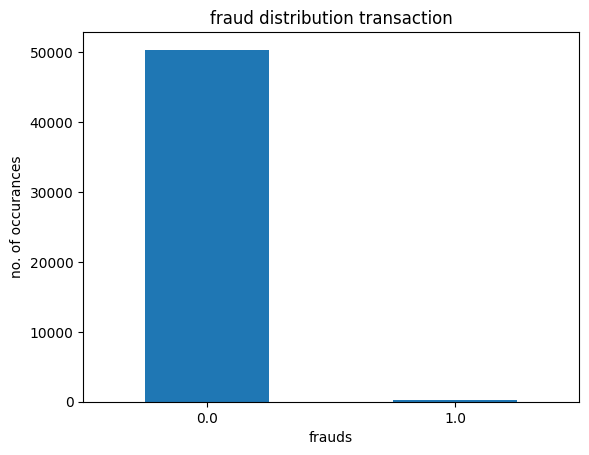

In [ ]:
set_is_fraud=pd.value_counts(data['is_fraud'],sort=True)
set_is_fraud.plot(kind='bar',rot=0)
plt.title("fraud distribution transaction")
plt.xlabel("frauds")
plt.ylabel("no. of occurances")

array([[<Axes: title={'center': 'Unnamed: 0'}>,
        <Axes: title={'center': 'cc_num'}>,
        <Axes: title={'center': 'amt'}>],
       [<Axes: title={'center': 'zip'}>, <Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>],
       [<Axes: title={'center': 'city_pop'}>,
        <Axes: title={'center': 'unix_time'}>,
        <Axes: title={'center': 'merch_lat'}>],
       [<Axes: title={'center': 'merch_long'}>,
        <Axes: title={'center': 'is_fraud'}>, <Axes: >]], dtype=object)

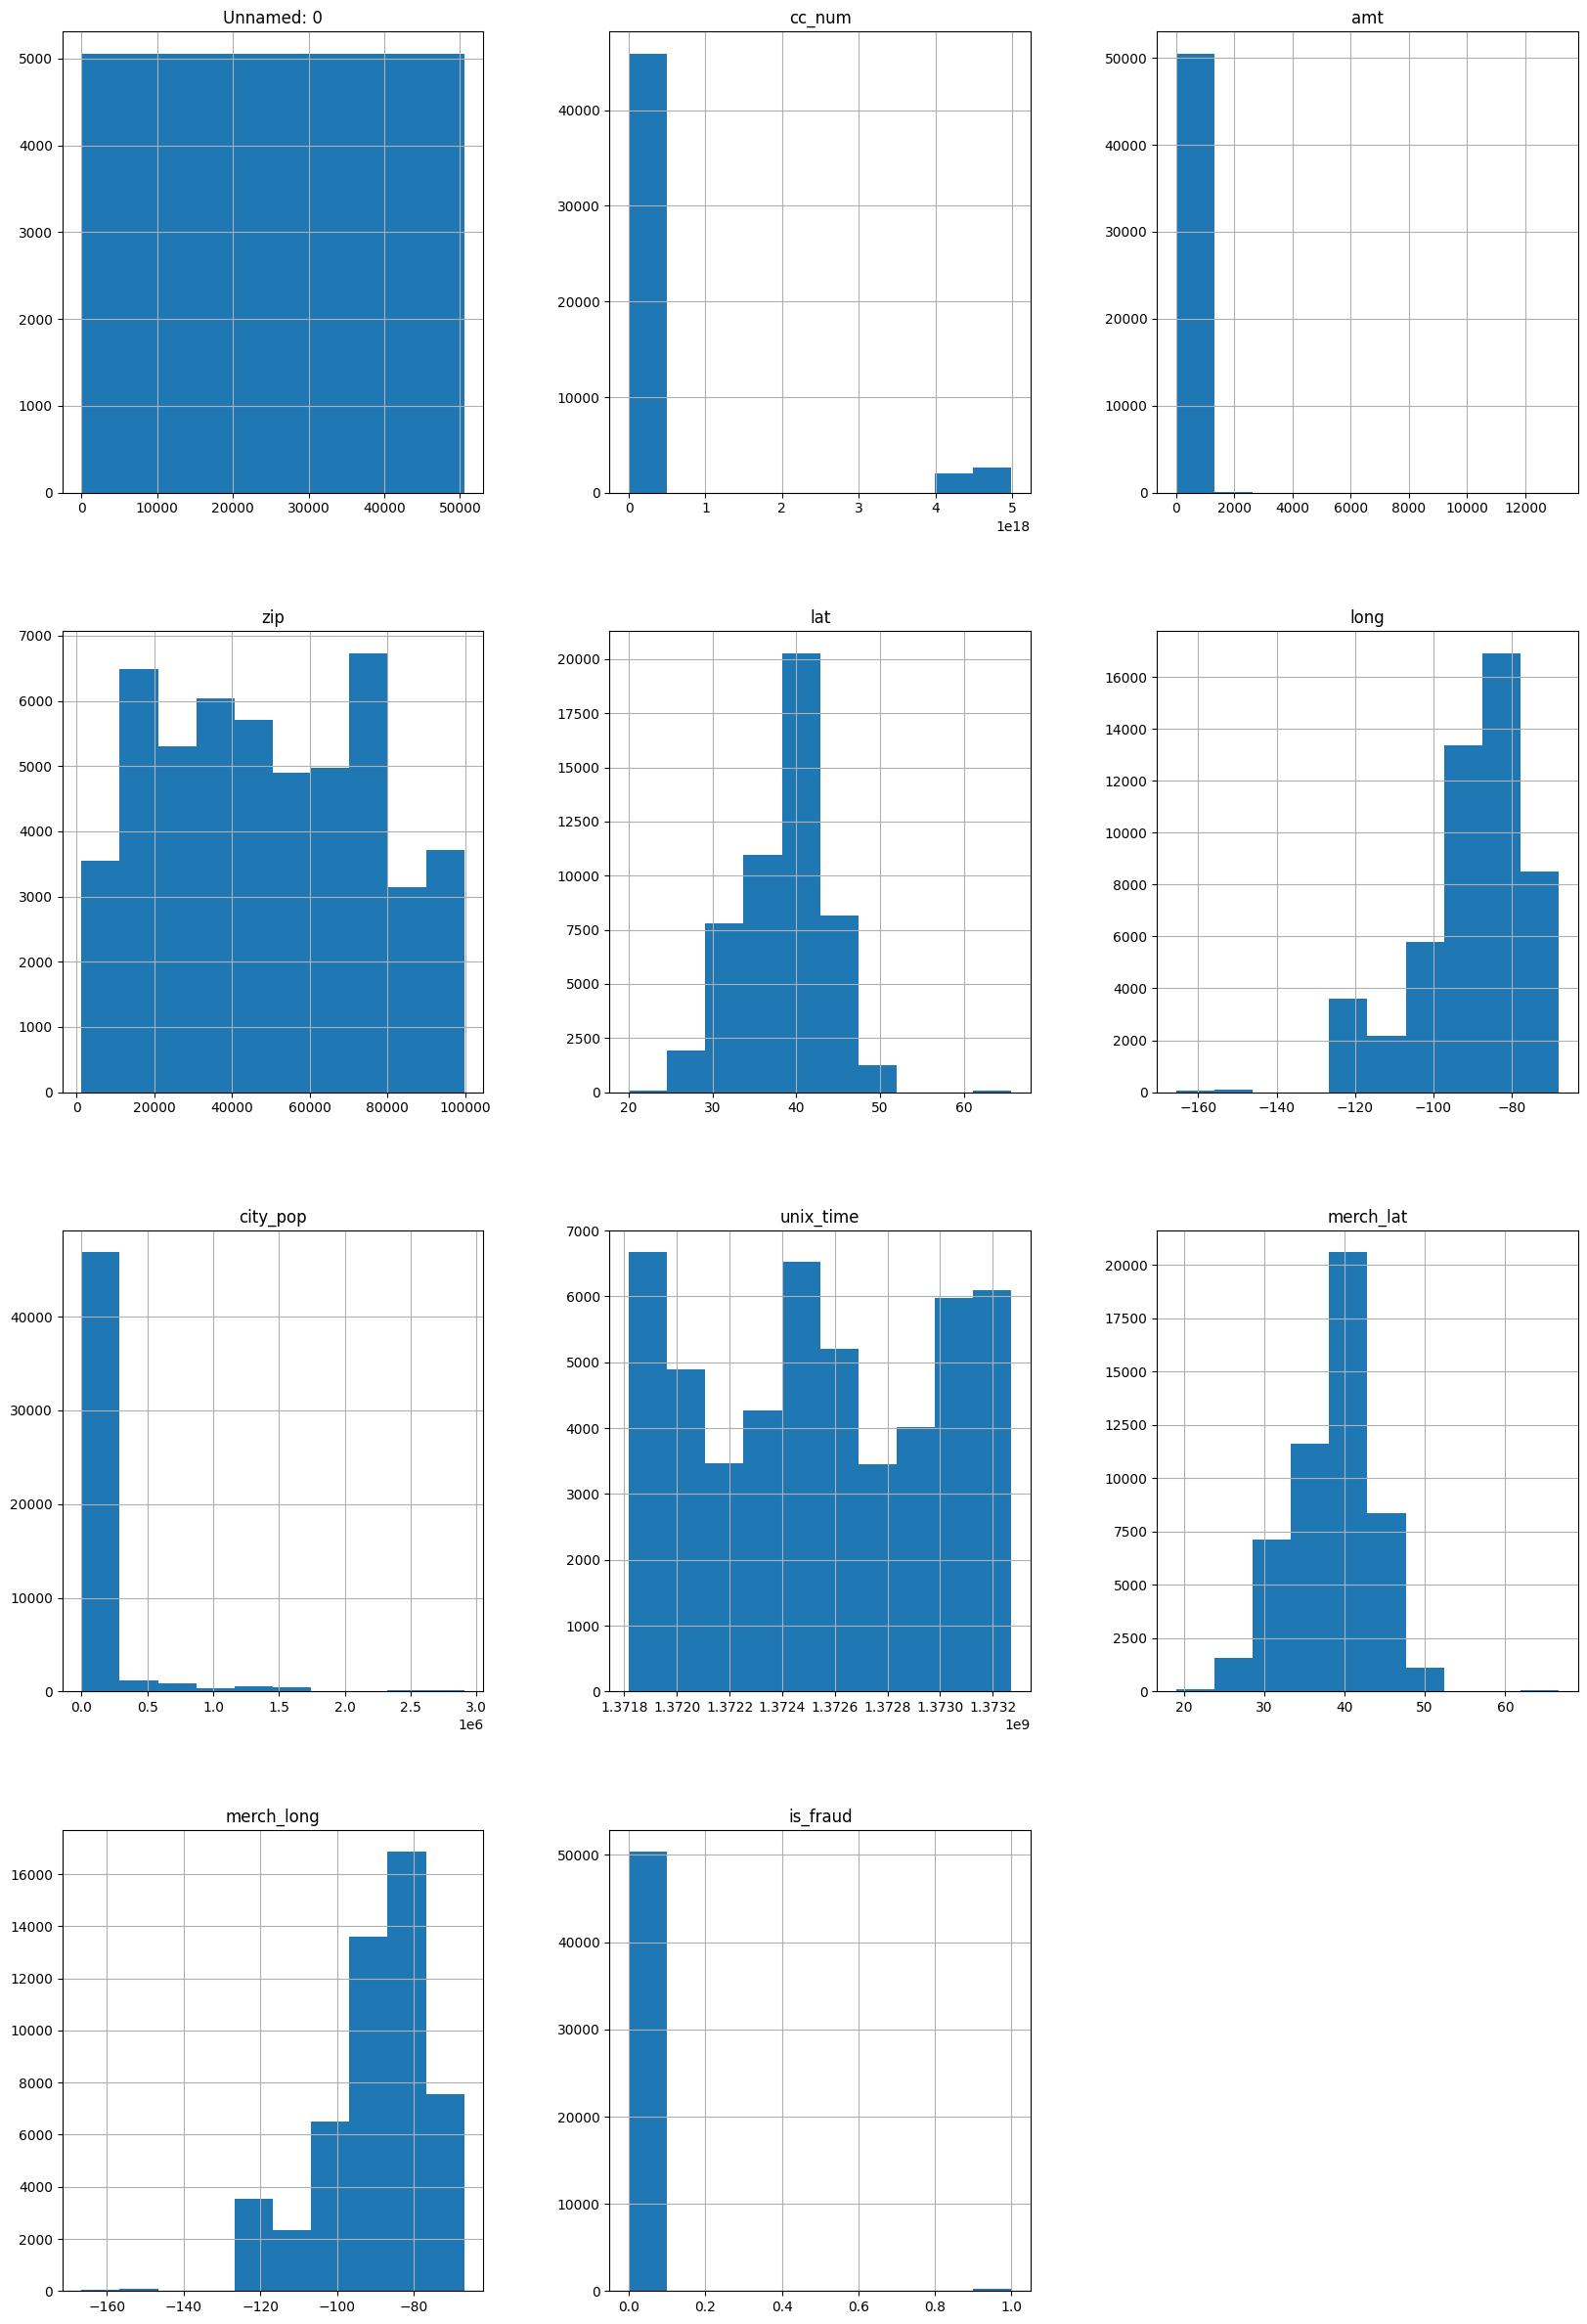

In [ ]:
data.hist(figsize=(20,30))


In [ ]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [ ]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
data['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [ ]:
legit=data[data.is_fraud==0]
fraud=data[data.is_fraud==1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(553574, 23)
(2145, 23)


In [ ]:
legit.amt.describe()

count    553574.000000
mean         67.614408
std         152.471931
min           1.000000
25%           9.600000
50%          47.150000
75%          82.620000
max       22768.110000
Name: amt, dtype: float64

In [ ]:
fraud.amt.describe()

count    2145.000000
mean      528.356494
std       392.747594
min         1.780000
25%       214.510000
50%       371.940000
75%       907.770000
max      1320.920000
Name: amt, dtype: float64

In [ ]:
legit_sample=legit.sample(n=1573)

In [ ]:
new_data['is_fraud'].value_counts()

is_fraud
0    50356
1     2145
Name: count, dtype: int64

In [ ]:
X=new_data.drop(columns='is_fraud',axis=1)
Y=new_data['is_fraud']

In [ ]:
print(X)

        Unnamed: 0 trans_date_trans_time            cc_num  \
121099      121099   2020-08-02 20:48:57  6592074504369261   
553593      553593   2020-12-31 11:33:02      676173792455   
512672      512672   2020-12-22 04:48:03  2233882705243596   
248403      248403   2020-09-20 06:30:17  3521815216091574   
515003      515003   2020-12-22 14:46:31  4170689372027579   
...            ...                   ...               ...   
517197      517197   2020-12-22 22:05:48  2242176657877538   
517274      517274   2020-12-22 22:18:07  2242176657877538   
517341      517341   2020-12-22 22:31:48  2242176657877538   
517529      517529   2020-12-22 23:06:03  2242176657877538   
517571      517571   2020-12-22 23:13:39  2242176657877538   

                                   merchant       category      amt     first  \
121099                     fraud_Mohr-Bayer   shopping_net     1.08    Amanda   
553593               fraud_Erdman-Kertzmann  gas_transport    56.05  Brittany   
512672      

In [ ]:
print(Y)

121099    0
553593    0
512672    0
248403    0
515003    0
         ..
517197    1
517274    1
517341    1
517529    1
517571    1
Name: is_fraud, Length: 52501, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(52501, 22) (42000, 22) (10501, 22)


In [ ]:
v1=lambda x:float(x[1:-1])

In [ ]:
model = LogisticRegression()

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=['street','city','state','trans_date_trans_time','merchant','category','first','last','gender','job','dob','trans_num']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_X=transformer.fit_transform(X)
transformed_X

<52501x109645 sparse matrix of type '<class 'numpy.float64'>'
	with 1155022 stored elements in Compressed Sparse Row format>

In [ ]:
pd.DataFrame(transformed_X)

,0
0,"(0, 794)\t1.0\n (0, 1529)\t1.0\n (0, 1810)..."
1,"(0, 65)\t1.0\n (0, 1611)\t1.0\n (0, 1777)\..."
2,"(0, 634)\t1.0\n (0, 1666)\t1.0\n (0, 1797)..."
3,"(0, 157)\t1.0\n (0, 1136)\t1.0\n (0, 1778)..."
4,"(0, 778)\t1.0\n (0, 1148)\t1.0\n (0, 1808)..."
...,...
52496,"(0, 115)\t1.0\n (0, 1625)\t1.0\n (0, 1797)..."
52497,"(0, 115)\t1.0\n (0, 1625)\t1.0\n (0, 1797)..."
52498,"(0, 115)\t1.0\n (0, 1625)\t1.0\n (0, 1797)..."
52499,"(0, 115)\t1.0\n (0, 1625)\t1.0\n (0, 1797)..."


In [ ]:
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(transformed_X, Y, test_size=0.2)
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
model.score(X_train,Y_train)

0.9591428571428572

In [2]:
#fradulent credit card transaction
import pandas as np